# 0. Presentation

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer
vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR).
It is free and open-source software released under the Modified BSD license. Although the Python interface is 
more polished and the primary focus of development, PyTorch also has a C++ interface.

A number of pieces of Deep Learning software are built on top of PyTorch, including Tesla Autopilot,Uber's Pyro, 
HuggingFace's Transformers, PyTorch Lightning, and Catalyst.

PyTorch provides two high-level features:
    
    1. Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU) 
    
    2. Deep neural networks built on a tape-based automatic differentiation system 
    
![](profiler.png)
   

# 1. Installation

<span style='color:green '> Anaconda : To install PyTorch via Anaconda, use the following conda command: </span>

<span style='color:blue '> Pip : To install PyTorch via pip, use the following command: </span>

Verification : To ensure that PyTorch was installed correctly, we can verify the installation by importing the torch module.

In [2]:
import torch

# 2. Tensors

<span style='color:green'>
At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix, or any n-dimensional array. Let's create a tensor with a single number.
</span>

In [3]:
#Create a scalar (zero-dimensional tensor)
t0 = torch.tensor(2.)
t0

tensor(2.)

<span style='color:red'> 
"2." is a shorthand for 2.0. It is used to indicate to Python (and PyTorch) that you want to create a floating-point number. We can verify this by checking the dtype attribute of our tensor.
</span>

In [4]:
t0.dtype

torch.float32

<span style='color:green'> Let's try creating more complex tensors. </span>

In [5]:
#Create a vector (one-dimensional tensor)
t1 = torch.tensor([1., 2, 3, 4])
t1

tensor([1., 2., 3., 4.])

In [6]:
#Create a matrix (two-dimensional tensor) t2
t2=torch.tensor([[2., 4.],
                [3., 0.],
                [1., 2.]])

In [7]:
#Create a 3-dimensional tensor t3
t3=torch.tensor([
    [11, 12, 13],
     [13, 14, 15],
     [15, 16, 17]])

<span style='color:green'>
Tensors can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the .shape property of a tensor.
</span>

In [8]:
print(t0)
t0.shape

tensor(2.)


torch.Size([])

In [9]:
#print the size of t1
print(t1)
t1.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [10]:
#print the size of t2
print(t2)
t2.shape

tensor([[2., 4.],
        [3., 0.],
        [1., 2.]])


torch.Size([3, 2])

In [11]:
#print the size of t3
print(t3)
t3.shape

tensor([[11, 12, 13],
        [13, 14, 15],
        [15, 16, 17]])


torch.Size([3, 3])

<span style='color:red '> Note that it's not possible to create tensors with an improper shape. </span>

In [12]:
# Matrix (2-dimensional tensor)
t4 = torch.tensor([[5., 6, 11], 
                   [7, 8,1], 
                   [9, 10,1]])
t4

tensor([[ 5.,  6., 11.],
        [ 7.,  8.,  1.],
        [ 9., 10.,  1.]])

<span style='color:red '> A ValueError is thrown because the lengths of the rows [5., 6, 11] and [7, 8] don't match. </span>

# 3. Tensor operations and gradients

<span style='color:green'> We can combine tensors with the usual arithmetic operations. Let's look at an example: </span>

In [13]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

<span style='color:green'> We've created three tensors: x, w, and b, all numbers. w and b have an additional parameter requires_grad set to True. We'll see what it does in just a moment.
Let's create a new tensor y by combining these tensors. </span> $y=w*x+b$

In [14]:
# insert the Arithmetic operation here 
y=w*x+b

As expected, y is a tensor with the value 4 * 3 + 5 = 17. What makes PyTorch unique is that we can automatically compute the derivative of y w.r.t. the tensors that have requires_grad set to True i.e. w and b. This feature of PyTorch is called autograd (automatic gradients).

To compute the derivatives, we can invoke the .backward method on our result y.

In [15]:
# Compute derivatives  using the backward 
y.backward()

C:\Users\aoudj\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


The derivatives of y with respect to the input tensors are stored in the .grad property of the respective tensors.



In [16]:
# print the  Display gradients using the grad 
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, dy/dw has the same value as x, i.e., 3, and dy/db has the value 1. Note that x.grad is None because x doesn't have requires_grad set to True.

The "grad" in w.grad is short for gradient, which is another term for derivative. The term gradient is primarily used while dealing with vectors and matrices.

# 4.Tensor functions

Apart from arithmetic operations, the torch module also contains many functions for creating and manipulating tensors. Let's look at some examples.

In [18]:
# Create a tensor with a fixed value for every element
t6 = torch.full((3, 2), 42)
t6
t6.shape


torch.Size([3, 2])

In [19]:
# Create other tensors with the tensor fuctions 


In [20]:
# Create a tensor filled with the scalar value 0, with the shape defined by the variable argument size. 
#(using the function zeros)
 
  
zero_tensor = torch.zeros([3,2]) 
print(zero_tensor)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [21]:
# Concatenate two tensors with compatible shapes t3 and t6 in t7 using the function of the concatenation 
t3_n=torch.reshape(t3, [3, 3])
t6_n=torch.reshape(t6, [2, 3])
t7=torch.cat((t6_n, t3_n))
print(t7)

tensor([[42, 42, 42],
        [42, 42, 42],
        [11, 12, 13],
        [13, 14, 15],
        [15, 16, 17]])


In [22]:
# Compute the sin of each element of a tensor t8
t8=torch.sin(t2)
print(t8)

tensor([[ 0.9093, -0.7568],
        [ 0.1411,  0.0000],
        [ 0.8415,  0.9093]])


In [23]:
# compute the shape of t8
t8.shape

torch.Size([3, 2])

In [63]:
# Change the shape of a tensor t8 in t9
t9=torch.reshape(t8, [3, 2])
print(t9)

tensor([[ 0.9093, -0.7568],
        [ 0.1411,  0.0000],
        [ 0.8415,  0.9093]])


In [24]:
# Create a a 2-D tensor with ones on the diagonal and zeros elsewhere using the function eye of pytorch 
eye_tensor = torch.eye(4, 3)
eye_tensor


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])

In [25]:
#Splits the tensor into chunks. Each chunk is a view of the original tensor using the function split of pytorch 
result_split=torch.split(eye_tensor,2)
print(result_split)

(tensor([[1., 0., 0.],
        [0., 1., 0.]]), tensor([[0., 0., 1.],
        [0., 0., 0.]]))


In [3]:
#Expects input to be <= 2-D tensor and transposes dimensions 0 and 1.0-D and 1-D tensors are returned as is.
#When input is a 2-D tensor this is equivalent to transpose(input, 0, 1).
t12 = torch.randn(2, 3)
t12
t13=torch.t(t12)
t13

tensor([[-0.9165, -0.0429],
        [ 0.6507, -0.5316],
        [-0.8908, -1.6113]])

In [5]:
#Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)[0,1)
rand_tensor = torch.rand(3, 4)
rand_tensor

tensor([[0.8391, 0.4497, 0.2515, 0.6054],
        [0.9807, 0.3599, 0.2039, 0.6544],
        [0.3277, 0.7276, 0.8986, 0.6814]])

In [27]:
#Computes the absolute value of each element in input using the abs tensor fucyion 
abs=torch.abs(rand_tensor)
print(abs)

tensor([[0.2346, 0.8554, 0.0951, 0.4239],
        [0.7421, 0.7715, 0.7423, 0.7728],
        [0.3638, 0.2396, 0.6820, 0.5731]])


In [7]:
#Add the scalar other to each element of the input input and returns a new resulting tensor.
scalr_tensor= torch.add(rand_tensor, 2)
print(scalr_tensor)

tensor([[2.8391, 2.4497, 2.2515, 2.6054],
        [2.9807, 2.3599, 2.2039, 2.6544],
        [2.3277, 2.7276, 2.8986, 2.6814]])


In [33]:
from fractions import Fraction as fraction
#Computes the fractional portion of each element in input.
torch.frac(torch.tensor([1, 2.5, -3.2]))

tensor([ 0.0000,  0.5000, -0.2000])

In [35]:
import math
#Returns a new tensor with the exponential of the elements of the input tensor input.
torch.exp(torch.tensor([0, math.log(2.)]))

tensor([1., 2.])

You can learn more about tensor operations here: https://pytorch.org/docs/stable/torch.html . Experiment with some more tensor functions and operations using the empty cells below.

# Interoperability with Numpy

Numpy is a popular open-source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays and has a vast ecosystem of supporting libraries, including:

Pandas for file I/O and data analysis

Matplotlib for plotting and visualization

OpenCV for image and video processing

Instead of reinventing the wheel, PyTorch interoperates well with Numpy to leverage its existing ecosystem of tools and libraries.

Here's how we create an array in Numpy:


In [36]:
import numpy as np

# create a random numpy matrix 
m = np.random.rand(3, 4)
print(m)

[[0.14638804 0.64699296 0.50235913 0.06016135]
 [0.86187898 0.72962926 0.16999062 0.39892092]
 [0.29194877 0.47911836 0.09015527 0.80038486]]


We can convert a Numpy array to a PyTorch tensor using torch.from_numpy.

In [37]:
# convert a numpy matrix to a tensor 
tensor= torch.from_numpy(m)


Let's verify that the numpy array and torch tensor have similar data types.

In [94]:
# verify the element type 
print(tensor)

tensor([[0.7272, 0.8304, 0.1509, 0.6712],
        [0.0364, 0.5876, 0.8915, 0.7981],
        [0.2261, 0.4311, 0.5822, 0.8195]], dtype=torch.float64)


We can convert a PyTorch tensor to a Numpy array using the .numpy method of a tensor.

In [38]:
# Convert a torch tensor to a numpy array
numpy = tensor.detach().numpy()
numpy

array([[0.14638804, 0.64699296, 0.50235913, 0.06016135],
       [0.86187898, 0.72962926, 0.16999062, 0.39892092],
       [0.29194877, 0.47911836, 0.09015527, 0.80038486]])

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

You might wonder why we need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

Autograd: The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
GPU support: While working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a Graphics Processing Unit (GPU). Computations that might typically take hours can be completed within minutes using GPUs.
We'll leverage both these features of PyTorch extensively in in the the coming sessions.

# Data Generation

For convenience and visualization, we will only use two features in this notebook, so we are still able to plot them together with the target class and decision boundary

First we will create some artificial data:

-
m
1
=
10
 examples for class 0 -
m
2
=
15
 examples for class 1 -
n
=
2
 features for each example

No exercise yet, just execute the cells.

In [8]:
import numpy as np
m1 = 10
m2 = 15
m = m1 + m2
n = 2
X = np.ndarray((m,n))
X.shape

(25, 2)

In [9]:
y = np.zeros((m))
y[m1:] = y[m1:] + 1.0
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
### complet the code  to generate linearly sperable data
def x2_function_class_0(x):
    return -x*2 + 2

def x2_function_class_1(x):
    return -x*2 + 4



In [11]:
x1_min = -5
x1_max = +5
X[:m1,0] = np.linspace(x1_min, x1_max, m1)
X[m1:,0] = np.linspace(x1_min+0.5, x1_max-0.2, m2)
X[:m1,1] = x2_function_class_0(X[:m1,0])
X[m1:,1] = x2_function_class_1(X[m1:,0])

In [12]:
### complet the code to generate NOT linearly sperable data
def x2_function_class_0(x):
    return np.sin(x)

def x2_function_class_1(x):
    return np.sin(x) + 1


In [13]:
x1_min = -5
x1_max = +5

X[:m1,0] = np.linspace(x1_min, x1_max, m1)
X[m1:,0] = np.linspace(x1_min+0.5, x1_max-0.2, m2)
X[:m1,1] = x2_function_class_0(X[:m1,0])
X[m1:,1] = x2_function_class_1(X[m1:,0])

In [15]:
import matplotlib.pyplot as plt

def plot_data():
    plt.scatter(X[:m1,0], X[:m1,1], alpha=0.5, label='class 0 train data')
    plt.scatter(X[m1:,0], X[m1:,1], alpha=0.5, label='class 1 train data')

    plt.plot(x1_line, x2_line_class_0, alpha=0.2, label='class 0 true target func')
    plt.plot(x1_line, x2_line_class_1, alpha=0.2, label='class 1 true target func')
    plt.legend(loc=1)

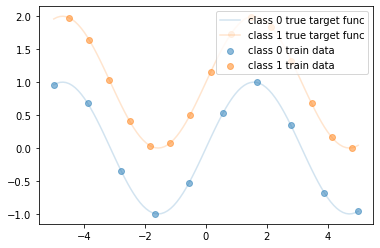

In [16]:
x1_line = np.linspace(x1_min, x1_max, 100)
x2_line_class_0 = x2_function_class_0(x1_line)
x2_line_class_1 = x2_function_class_1(x1_line)    

plot_data()

# Convert the Data to torch tensors

In [17]:
# convert  the X and Y to tensors 
X_tensor= torch.tensor(X)
y_tensor= torch.tensor(y)

In [18]:
# print  the shapes 
print(X_tensor.shape) ### should be [25,2]
print(y_tensor.shape) ### should be [25,1]

torch.Size([25, 2])
torch.Size([25])


# Examples 

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network:

In [46]:
import math 

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data using the tensor functions x and y 
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 99.09951782226562
199 72.65789794921875
299 53.96278381347656
399 40.74380874633789
499 31.396398544311523
599 24.78631591796875
699 20.11178207397461
799 16.805862426757812
899 14.46776008605957
999 12.814093589782715
1099 11.644453048706055
1199 10.817147254943848
1299 10.23195743560791
1399 9.818017959594727
1499 9.525201797485352
1599 9.31806755065918
1699 9.17153549194336
1799 9.067872047424316
1899 8.994539260864258
1999 8.942657470703125
Result: y = -0.011838635429739952 + 0.8561276793479919 x + 0.0020423620007932186 x^2 + -0.09324317425489426 x^3


In [19]:
# -*- coding: utf-8 -*-
import torch
import math

import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

C:\Users\aoudj\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


99 6382.2607421875
199 4223.306640625
299 2795.683837890625
399 1851.6572265625
499 1227.4127197265625
599 814.6258544921875
699 541.6669311523438
799 361.170166015625
899 241.8150177001953
999 162.88998413085938
1099 110.70004272460938
1199 76.18878936767578
1299 53.36774444580078
1399 38.27703857421875
1499 28.298114776611328
1599 21.699357986450195
1699 17.335830688476562
1799 14.450335502624512
1899 12.542229652404785
1999 11.280475616455078
Result: y = 0.0012578775640577078 + 0.8085083365440369 x + -0.0002170044172089547 x^2 + -0.08646973222494125 x^3


# PyTorch: Defining new autograd functions 


Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The forward function computes output Tensors from input Tensors. The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch we can easily define our own autograd operator by defining a subclass of torch.autograd.Function and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

In this example we define our model as $y=a+bP_3(c+dx)$ instead of y=a+bx+cx^2+dx^3, where $P_3(x)=1/2(5x^3−3x)$ is the Legendre polynomial of degree three. We write our own custom autograd function for computing forward and backward of P3, and use it to implement our model:

In [23]:
# -*- coding: utf-8 -*-
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.

#......
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.


#The weights a, b, c, d
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)
learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.973188400268555
899 17.7457275390625
999 14.877889633178711
1099 12.931766510009766
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -5.423830273798558e-09 + -2.208526849746704 * P3(1.3320399228078372e-09 + 0.2554861009120941 x)


Example of data transformation 

Simple Library
PyTorch code is simple. It is easy to understand, and you use the library instantly. For example, take a look at the code snippet below:

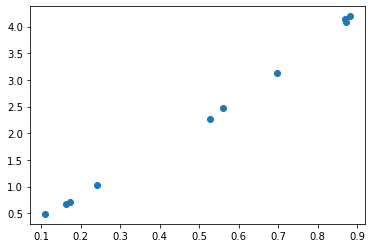

In [27]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

# define x and y using the numpuy library 
x = np.random.rand(10)
y = np.sin(x) * np.power(x,2) + 4*x + np.random.rand(10)*0.1

plt.scatter(x, y)
plt.show()

In [28]:
# convert numpy array to tensor in shape of input size x and y 
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)


tensor([[0.8715],
        [0.1638],
        [0.5263],
        [0.2416],
        [0.8808],
        [0.6960],
        [0.1110],
        [0.8688],
        [0.5607],
        [0.1734]]) tensor([[4.0788],
        [0.6653],
        [2.2692],
        [1.0277],
        [4.1927],
        [3.1349],
        [0.4863],
        [4.1334],
        [2.4804],
        [0.7113]])


# Tensorboard

Now we’ll set up TensorBoard, importing tensorboard from torch.utils and defining a SummaryWriter, our key object for writing information to TensorBoard.

TensorBoard: TensorFlow's visualization toolkit

TensorBoard provides the visualization and tooling needed for machine learning experimentation:
 ->Tracking and visualizing metrics such as loss and accuracy
 
 ->Visualizing the model graph (ops and layers)
 
 ->Viewing histograms of weights, biases, or other tensors as they change over time
 
 ->Projecting embeddings to a lower dimensional space
 
 ->Displaying images, text, and audio data
 
 ->Profiling TensorFlow programs
 
And much more

# VISUALIZING MODELS, DATA, AND TRAINING WITH TENSORBOARD
In the 60 Minute Blitz, we show you how to load in data, feed it through a model we define as a subclass of nn.Module, train this model on training data, and test it on test data. To see what’s happening, we print out some statistics as the model is training to get a sense for whether training is progressing. However, we can do much better than that: PyTorch integrates with TensorBoard, a tool designed for visualizing the results of neural network training runs. This tutorial illustrates some of its functionality, using the Fashion-MNIST dataset which can be read into PyTorch using torchvision.datasets.

In this tutorial, we’ll learn how to:

    Read in data and with appropriate transforms (nearly identical to the prior tutorial).
    
    Set up TensorBoard.
    
    Write to TensorBoard.

    Inspect a model architecture using TensorBoard.
    
    Use TensorBoard to create interactive versions of the visualizations we created in last tutorial, with less code
    Specifically, on point #5, we’ll see:

A couple of ways to inspect our training data
How to track our model’s performance as it trains
How to assess our model’s performance once it is trained.

In [38]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

We’ll define a similar model architecture from that tutorial, making only minor modifications to account for the fact that the images are now one channel instead of three and 28x28 instead of 32x32:



In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

We’ll define the same optimizer and criterion from before:

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 1. TensorBoard setup
Now we’ll set up TensorBoard, importing tensorboard from torch.utils and defining a SummaryWriter, our key object for writing information to TensorBoard.

In [43]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

Note that this line alone creates a runs/fashion_mnist_experiment_1 folder.

# 2. Writing to TensorBoard

Now let’s write an image to our TensorBoard - specifically, a grid - using make_grid.

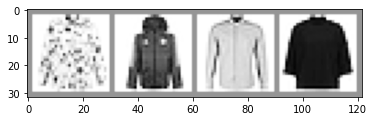

In [44]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [45]:
tensorboard --logdir=runs

SyntaxError: cannot assign to operator (<ipython-input-45-8dfe2aebc706>, line 1)

In [46]:
writer.add_graph(net, images)
writer.close()

Now you know how to use TensorBoard! This example, however, could be done in a Jupyter Notebook - where TensorBoard really excels is in creating interactive visualizations. We’ll cover one of those next, and several more by the end of the tutorial.

# 3. Inspect the model using TensorBoard
One of TensorBoard’s strengths is its ability to visualize complex model structures. Let’s visualize the model we built.

Now upon refreshing TensorBoard you should see a “Graphs” tab that looks like this:

Go ahead and double click on “Net” to see it expand, seeing a detailed view of the individual operations that make up the model.

TensorBoard has a very handy feature for visualizing high dimensional data such as image data in a lower dimensional space; we’ll cover this next.

# 4. Adding a “Projector” to TensorBoard
We can visualize the lower dimensional representation of higher dimensional data via the add_embedding method

In [47]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

Now in the “Projector” tab of TensorBoard, you can see these 100 images - each of which is 784 dimensional - projected down into three dimensional space. Furthermore, this is interactive: you can click and drag to rotate the three dimensional projection. Finally, a couple of tips to make the visualization easier to see: select “color: label” on the top left, as well as enabling “night mode”, which will make the images easier to see since their background is white:

In [225]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6007 (pid 1943), started 1:09:23 ago. (Use '!kill 1943' to kill it.)

Now we’ve thoroughly inspected our data, let’s show how TensorBoard can make tracking model training and evaluation clearer, starting with training.

# 5. Tracking model training with TensorBoard
In the previous example, we simply printed the model’s running loss every 2000 iterations. Now, we’ll instead log the running loss to TensorBoard, along with a view into the predictions the model is making via the plot_classes_preds function.

In [48]:
# helper functions

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

Finally, let’s train the model using the same model training code from the prior tutorial, but writing results to TensorBoard every 1000 batches instead of printing to console; this is done using the add_scalar function.

In addition, as we train, we’ll generate an image showing the model’s predictions vs. the actual results on the four images included in that batch.

In [49]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


In [201]:
tensorboard --version

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
2.4.1

In [239]:
''''import numpy as np
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
from torch.utils.tensorboard import SummaryWriter

vectors = np.array([[0,0,1], [0,1,0], [1,0,0], [1,1,1]])
metadata = ['001', '010', '100', '111']  # labels
writer = SummaryWriter()
writer.add_embedding(vectors, metadata)
writer.close()
%load_ext tensorboard
%tensorboard --logdir=runs'''''

"'import numpy as np\nimport tensorflow as tf\nimport tensorboard as tb\ntf.io.gfile = tb.compat.tensorflow_stub.io.gfile\nfrom torch.utils.tensorboard import SummaryWriter\n\nvectors = np.array([[0,0,1], [0,1,0], [1,0,0], [1,1,1]])\nmetadata = ['001', '010', '100', '111']  # labels\nwriter = SummaryWriter()\nwriter.add_embedding(vectors, metadata)\nwriter.close()\n%load_ext tensorboard\n%tensorboard --logdir=runs"